In [1]:
import warnings

warnings.filterwarnings(action="ignore")
import os.path as pth
import os
import openmdao.api as om
from fastoad import api as api_cs25
from fastga.command import api as api_cs23
import logging
from fastoad.gui import VariableViewer
import shutil

# Define relative path
DATA_FOLDER_PATH = "data"
WORK_FOLDER_PATH = "workdir"

# Remove work folder
shutil.rmtree(WORK_FOLDER_PATH, ignore_errors=True)

# Define files
CONFIGURATION_FILE = pth.join(DATA_FOLDER_PATH, "oad_process_turboprop.yml")
SOURCE_FILE = pth.join(DATA_FOLDER_PATH, "Source File Twin Otter DHC6-400.xml")
PROPELLER_FILE = pth.join(DATA_FOLDER_PATH,"propeller_coeff_inputs.xml")
# For having log messages on screen
#logging.basicConfig(level=logging.INFO, format="%(levelname)-8s: %(message)s")

# For using all screen width
#from IPython.core.display import display, HTML

#display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
INUPT_FILE_PATH = api_cs25.generate_inputs(CONFIGURATION_FILE, SOURCE_FILE, overwrite=True)
api_cs25.variable_viewer(INUPT_FILE_PATH)

Failed to import module fastga.models.propulsion.fuel_propulsion.basicTurbo_prop.unitary_tests
Failed to import module fastga.models.loops.unitary_tests
Failed to import module fastga.models.handling_qualities.unitary_tests
Failed to import module fastga.models.propulsion.fuel_propulsion.basicTurbo_prop_map.unitary_tests
Failed to import module fastga.models.weight.mass_breakdown.unitary_tests
Failed to import module fastga.models.geometry.unitary_tests
Failed to import module fastga.models.weight.cg.unitary_tests
Failed to import module fastga.models.load_analysis.unitary_tests
Failed to import module fastga.models.aerodynamics.unitary_tests
Failed to import module fastga.models.propulsion.fuel_propulsion.basicIC_engine.unitary_tests
Failed to import module fastga.models.performances.unitary_tests


MDA


In [3]:
eval_problem = api_cs25.evaluate_problem(CONFIGURATION_FILE, overwrite=True)

C:\Users\c.liu\Anaconda3\envs\fast-ga-intern\lib\site-packages\openmdao\core\group.py:2831: UnitsWarning:<model> <class FASTOADModel>: Input 'propeller.propeller_aero.data:geometry:propeller:average_rpm' with units of 'rpm' is connected to output 'fastoad_inputs.data:geometry:propeller:average_rpm' which has no units.
C:\Users\c.liu\Anaconda3\envs\fast-ga-intern\lib\site-packages\openmdao\core\group.py:2831: UnitsWarning:<model> <class FASTOADModel>: Input 'aircraft_sizing.weight.mass_breakdown.owe.airframe_weight.wing_weight.compute_low_flange_mass_max_fuel.data:weight:airframe:wing:punctual_mass:mass' with units of 'kg' is connected to output 'fastoad_inputs.data:weight:airframe:wing:punctual_mass:mass' which has no units.
C:\Users\c.liu\Anaconda3\envs\fast-ga-intern\lib\site-packages\openmdao\core\group.py:2831: UnitsWarning:<model> <class FASTOADModel>: Input 'aircraft_sizing.weight.mass_breakdown.owe.airframe_weight.wing_weight.compute_low_flange_mass_min_fuel.data:weight:airframe


aircraft_sizing


Taper ratio outside of the range in Roskam's book, value clipped
Chord ratio value outside of the range in Roskam's book, value clipped
Chord ratio value outside of the range in Roskam's book, value clipped
Chord ratio value outside of the range in Roskam's book, value clipped
Chord ratio value outside of the range in Roskam's book, value clipped


Chord ratio value outside of the range in Roskam's book, value clipped
Taper ratio outside of the range in Roskam's book, value clipped


NL: NLBGS 1 ; 180218931 1


Taper ratio outside of the range in Roskam's book, value clipped
Chord ratio value outside of the range in Roskam's book, value clipped
Chord ratio value outside of the range in Roskam's book, value clipped
Taper ratio outside of the range in Roskam's book, value clipped


NL: NLBGS 2 ; 2402472.87 0.0133308574


Taper ratio outside of the range in Roskam's book, value clipped
Chord ratio value outside of the range in Roskam's book, value clipped
Chord ratio value outside of the range in Roskam's book, value clipped
Taper ratio outside of the range in Roskam's book, value clipped


NL: NLBGS 3 ; 3900489.51 0.021643062


Taper ratio outside of the range in Roskam's book, value clipped
Chord ratio value outside of the range in Roskam's book, value clipped
Chord ratio value outside of the range in Roskam's book, value clipped
Taper ratio outside of the range in Roskam's book, value clipped


NL: NLBGS 4 ; 6033571.74 0.0334791228


Taper ratio outside of the range in Roskam's book, value clipped
Chord ratio value outside of the range in Roskam's book, value clipped
Chord ratio value outside of the range in Roskam's book, value clipped
Taper ratio outside of the range in Roskam's book, value clipped


NL: NLBGS 5 ; 1636857.03 0.00908260312


Taper ratio outside of the range in Roskam's book, value clipped
Chord ratio value outside of the range in Roskam's book, value clipped
Chord ratio value outside of the range in Roskam's book, value clipped
Taper ratio outside of the range in Roskam's book, value clipped


NL: NLBGS 6 ; 858483.93 0.00476356132


Taper ratio outside of the range in Roskam's book, value clipped
Chord ratio value outside of the range in Roskam's book, value clipped
Chord ratio value outside of the range in Roskam's book, value clipped
Taper ratio outside of the range in Roskam's book, value clipped


NL: NLBGS 7 ; 196347.627 0.00108949502


Taper ratio outside of the range in Roskam's book, value clipped
Chord ratio value outside of the range in Roskam's book, value clipped


NL: NLBGS 8 ; 104436.465 0.000579497751
NL: NLBGS Converged


In [4]:
print(eval_problem)

In [12]:
RESULT_FOLDER_PATH = "results"
OUTPUT_FILE = pth.join(RESULT_FOLDER_PATH, "oad_process_outputs.xml")
CeRAS_OPT_OUTPUT_FILE = pth.join(RESULT_FOLDER_PATH, "problem_outputs_ottor400_mdo.xml")
shutil.copy(OUTPUT_FILE, CeRAS_OPT_OUTPUT_FILE)

'results\\problem_outputs_ottor400_mdo.xml'

In [13]:
import os.path as pth

import fastoad.api as oad
import fastga.utils.postprocessing.post_processing_api as api_plots

# For using all screen width
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

In [14]:
ottor400_MDA_OUTPUT_FILE = pth.join(
    RESULT_FOLDER_PATH, "problem_outputs_ottor400_mdo.xml"
)

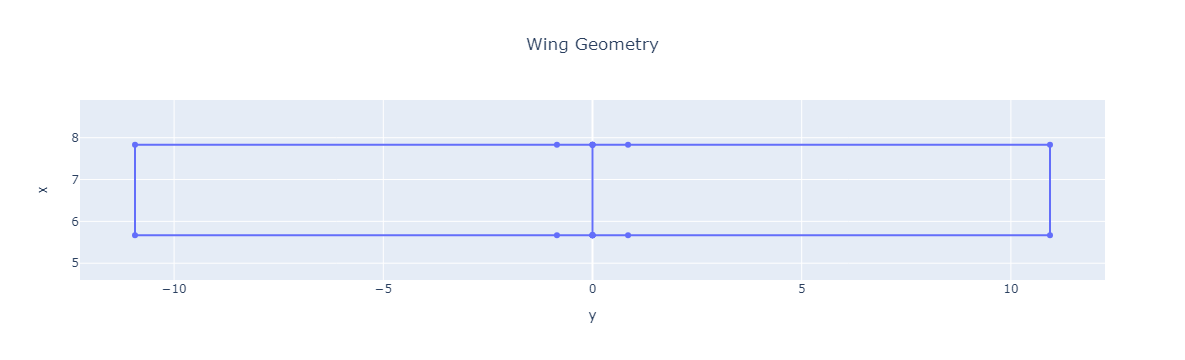

In [15]:
fig = oad.wing_geometry_plot(ottor400_MDA_OUTPUT_FILE, name="Twin Otter DHC6-400 MDA")
fig.show()

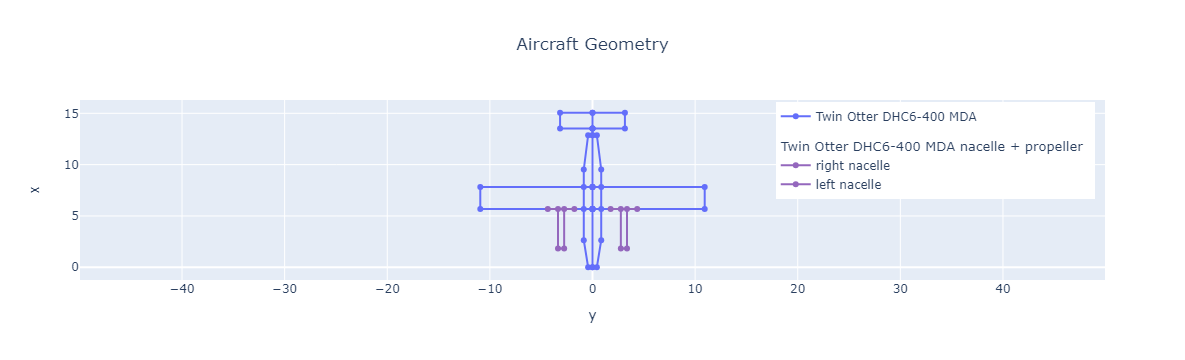

In [16]:
fig = api_plots.aircraft_geometry_plot(
    ottor400_MDA_OUTPUT_FILE, name="Twin Otter DHC6-400 MDA"
)
fig.show()

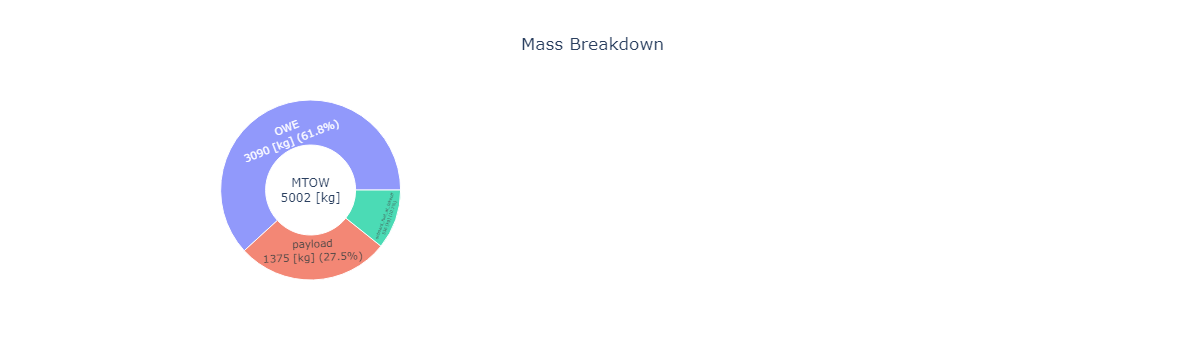

In [17]:
fig = api_plots.mass_breakdown_sun_plot(ottor400_MDA_OUTPUT_FILE)
fig.show()

In [18]:
api_cs25.variable_viewer(ottor400_MDA_OUTPUT_FILE)